# 字典构建- 从cata_18654_xls(2022-12最新)获取化学物质名称 TODO: 过滤无效的


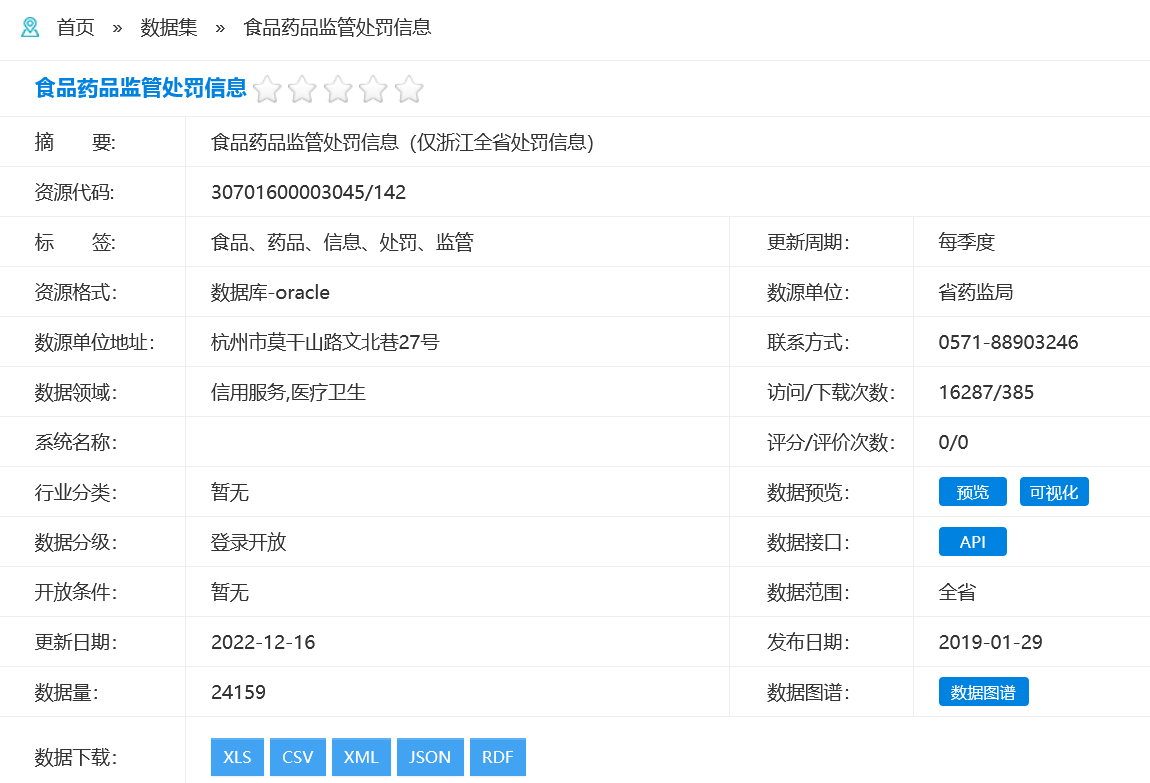


另外一部分字典来自 `Food_Additives.xls`, 由`/Association/Seed` 导入  
所有字典最终导入到数据库的 AssociationSet 表

In [1]:
import pandas as pd
import re

ALL_LIST = []

for id in range(1,7):
    data = pd.read_excel('cata_18654_xls/cata_18654_' + str(id) +'.xls')

    chemicals = data['检验项名称'].values # data['不合格项目││检验结果││标准值'].values
    #foods = data['样品名称'].values # data['食品名称'].values

    N = len(chemicals)

    filtered_chemicals = []

    for i in range(N):
        if chemicals[i] in ['钠','钾', '磷'] \
        or '各自用量占其最大使用量' in chemicals[i] or '标签' in chemicals[i] \
        or '脂肪' in chemicals[i] or '水分' in chemicals[i] \
        or '总糖' in chemicals[i] or '酸价' in chemicals[i] \
        or '酒精度' in chemicals[i] or '防腐剂' in chemicals[i] \
        or '蔗糖' in chemicals[i] or '菌落总数' in chemicals[i] \
        or '螨' in chemicals[i] or '防腐剂' in chemicals[i] or '过氧化值' in chemicals[i] \
        or '溶剂残留量' in chemicals[i] or '固形物' in chemicals[i] or '浑浊度' in chemicals[i] \
        or '总固体' in chemicals[i] or '负偏差' in chemicals[i] or '崩解时限' in chemicals[i] \
        or '烟点' in chemicals[i] or '色值' in chemicals[i] or '崩解时限' in chemicals[i] \
        or '维生素' in chemicals[i] or '蛋白质' in chemicals[i] or '营养成分' in chemicals[i] \
        or '附盐' in chemicals[i] or '酵母' in chemicals[i] or '比值' in chemicals[i] \
        or '大肠菌群' in chemicals[i] or '酸度' in chemicals[i] or '酸值' in chemicals[i] or 'ph' in chemicals[i].lower():
            continue

        if chemicals[i] == '黄曲霉毒素B1*' or chemicals[i] == '黄曲霉毒素B₁':
            chemicals[i]  = '黄曲霉毒素B1'

        # 去掉小括号内文字
        chemicals[i] = re.sub(u"\\(.*?\\）|\\（.*?\\)|\\（.*?\\）|\\(.*?\\)|\\{.*?\\}|\\[.*?\\]|\\<.*?\\>", "", chemicals[i])

        chemicals[i] = chemicals[i].replace('计数','').replace('含量','').replace('的残留量','')
        chemicals[i] = chemicals[i].strip('*')
        chemicals[i] = chemicals[i].strip(' ')
        # chemicals[i] = chemicals[i].strip('*')
        
        if '║' in chemicals[i]:
            filtered_chemicals.append(chemicals[i].split('║')[0])
        else:
            filtered_chemicals.append(chemicals[i])
            
    LISTi = sorted(set(filtered_chemicals))
    # foods = sorted(set(foods))
    ALL_LIST = sorted(set(ALL_LIST+LISTi))
    
ALL_LIST # 获取添加剂列表

['10-羟基-2-癸烯酸',
 '2,4-滴',
 '2,4-滴和2,4-滴钠盐',
 '4-氯苯氧乙酸',
 '4-氯苯氧乙酸钠',
 '6-苄基腺嘌呤',
 'N,N-双去甲基西布曲明',
 'N--L-α-天门冬氨-L-苯丙氨酸1-甲酯',
 'N-二甲基亚硝胺',
 'N-单去甲基西布曲明',
 'α-亚麻酸',
 'α-亚麻酸供能比',
 'β-苯乙醇',
 '☆苯甲酸及其钠盐',
 '丁基羟基茴香醚',
 '三唑磷',
 '三氯甲烷',
 '三聚氰胺',
 '不挥发酸',
 '不溶于水杂质',
 '丙二醇',
 '丙二醛',
 '丙溴磷',
 '丙酸',
 '丙酸乙酯',
 '丙酸及其钠盐、钙盐',
 '乐果',
 '乙二胺四乙酸二钠',
 '乙基香兰素',
 '乙基麦芽酚',
 '乙酰甲胺磷',
 '乙酰磺胺酸钾',
 '二丁基羟基甲苯',
 '二十二碳六烯酸',
 '二十碳四烯酸',
 '二氧化硫',
 '二氧化硫残留量',
 '二氧化碳气容量',
 '二甲戊灵',
 '五氯酚酸钠',
 '亚油酸',
 '亚油酸供能比',
 '亚硝酸盐',
 '亚硫酸盐',
 '亚麻酸',
 '亮蓝',
 '亮蓝及其铝色淀',
 '人参皂苷',
 '伐地那非',
 '低聚果糖',
 '余氯',
 '倍硫磷',
 '倍硫磷之和)',
 '倍硫磷之和,以倍硫磷表示）',
 '倍硫磷之和）',
 '偏硅酸',
 '克仑特罗',
 '克伦特罗',
 '克百威',
 '免疫球蛋白',
 '全氮',
 '冷冻试验',
 '净',
 '净及其允许短缺量',
 '利巴韦林',
 '副溶血性弧菌',
 '匹可硫酸钠',
 '单核细胞增生李斯特氏菌',
 '原麦汁浓度',
 '双乙酸钠',
 '叔丁基对苯二酚',
 '叶酸',
 '叶黄素',
 '吗啡',
 '吡唑醚菌酯',
 '吡虫啉',
 '含盐量',
 '呈味核苷酸二钠',
 '呋喃唑酮',
 '呋喃唑酮代谢物',
 '呋喃妥因代谢物',
 '呋喃它酮代谢物',
 '呋喃西林代谢物',
 '咖啡因',
 '咪鲜胺',
 '咪鲜胺和咪鲜胺锰盐',
 '商业无菌',
 '啶虫脒',
 '噻虫嗪',
 '噻虫胺',
 '四氯化碳',
 '土霉素',
 '土霉素/金霉素/四环素',
 '地塞米松',
 '地美硝唑',
 '地西泮',


In [2]:
filtered = ['亚硝酸盐', '氟甲砜霉素','硝基呋喃-呋喃咗酮代谢物','脱氢乙酸','防腐剂'] # 额外添加 添加剂术语

for item in ALL_LIST:
    if item == '/':
        continue
    
    duplicate = False
    
    for filtered_item in filtered:
        if filtered_item in item:
            duplicate = True
            break
    
    if duplicate ==False:
        filtered.append(item)

chem = filtered

确定最终化学物质列表

# 分析

In [3]:
import re
links = {}

for id in range(1,7):
    data = pd.read_excel('cata_18654_xls/cata_18654_' + str(id) +'.xls')
    # data.head()

    chemicals = data['检验项名称'].values # data['不合格项目││检验结果││标准值'].values
    foods = data['样品名称'].values # data['食品名称'].values

    N = len(foods)

    filtered_chemicals = []

    for i in range(N):
            
        for c in chem:
            if c in chemicals[i]:
                
                if '桶装' in foods[i] or '桥头' in foods[i] or '碗' in foods[i] or '碟' in foods[i] or '盘' in foods[i] or '盆' in foods[i] or '筷' in foods[i]:
                    continue
                    
                for word in ['婴儿配方奶粉', '奶茶', '粽叶', '竹盐', '啤酒', '黄酒', '香肠', '花生酱', '年糕条', '豆沙粽', '红薯粉条', '饮用水', '矿泉水']:
                    if word in foods[i]:
                        foods[i] = word
                
                if '左旋肉碱蛋白' in foods[i]:
                    foods[i] = '左旋肉碱蛋白粉'
                    
                foods[i] = re.sub(u"\\(.*?\\）|\\（.*?\\)|\\（.*?\\）|\\(.*?\\)|\\{.*?\\}|\\[.*?\\]|\\<.*?\\>", "", foods[i])
                
                if (foods[i], c) not in links:
                    links[(foods[i], c)] = 1
                else:
                    links[(foods[i], c)] += 1

In [4]:
len(links)

7075

In [5]:
links

{('红糖发糕', '脱氢乙酸'): 2,
 ('茂谷柑', '克百威'): 1,
 ('黄鱼', '恩诺沙星'): 43,
 ('杨梅', '甜蜜素'): 25,
 ('泥鳅', '恩诺沙星'): 156,
 ('生姜', '噻虫胺'): 301,
 ('杨梅', '糖精钠'): 17,
 ('桑葚', '脱氢乙酸'): 3,
 ('牛蛙', '恩诺沙星'): 713,
 ('牛蛙', '环丙沙星'): 391,
 ('韭菜', '镉'): 127,
 ('黄鱼', '环丙沙星'): 24,
 ('大黄鱼', '恩诺沙星'): 35,
 ('大黄鱼', '环丙沙星'): 16,
 ('红薯宽粉', '铝'): 2,
 ('海苔饼', '铝'): 12,
 ('鲫鱼', '恩诺沙星'): 139,
 ('鲫鱼', '环丙沙星'): 68,
 ('本地韭菜', '镉'): 2,
 ('鳊鱼', '恩诺沙星'): 409,
 ('鳊鱼', '环丙沙星'): 226,
 ('红薯粉条', '铝'): 13,
 ('绿豆糕', '脱氢乙酸'): 11,
 ('榨菜', '苯甲酸'): 49,
 ('中梅', '甜蜜素'): 2,
 ('油条', '铝'): 238,
 ('豇豆', '甲氨基阿维菌素苯甲酸盐'): 45,
 ('豇豆', '苯甲酸'): 45,
 ('豇豆', '阿维菌素'): 46,
 ('豇豆', '三唑磷'): 27,
 ('猪肉', '土霉素'): 2,
 ('豇豆', '灭蝇胺'): 102,
 ('青菜', '毒死蜱'): 21,
 ('泥鳅', '环丙沙星'): 77,
 ('豇豆', '倍硫磷'): 91,
 ('芒果', '吡唑醚菌酯'): 36,
 ('发糕', '山梨酸'): 1,
 ('粽叶', '铜'): 5,
 ('猪头肉', '山梨酸'): 3,
 ('乌鸡', '甲氧苄啶'): 18,
 ('盐焗味蛋', '山梨酸'): 1,
 ('冰鲜黄鱼', '恩诺沙星'): 3,
 ('冰鲜黄鱼', '环丙沙星'): 2,
 ('竹盐', '氯化钠'): 3,
 ('黄鳝', '恩诺沙星'): 336,
 ('豇豆', '氟'): 14,
 ('豇豆', '甲基异柳磷'): 39,
 ('麻花', '铝'): 11,
 ('牛蛙', '

In [6]:
import json

json_s = []

for key in links:
    item = []
    item.append(key[0])
    item.append(key[1])
    item.append(links[key])
    
    json_s.append(item)

textfile = open("18654.json", "w")
a = textfile.write(json.dumps(json_s))
textfile.close()

json_s

[['红糖发糕', '脱氢乙酸', 2],
 ['茂谷柑', '克百威', 1],
 ['黄鱼', '恩诺沙星', 43],
 ['杨梅', '甜蜜素', 25],
 ['泥鳅', '恩诺沙星', 156],
 ['生姜', '噻虫胺', 301],
 ['杨梅', '糖精钠', 17],
 ['桑葚', '脱氢乙酸', 3],
 ['牛蛙', '恩诺沙星', 713],
 ['牛蛙', '环丙沙星', 391],
 ['韭菜', '镉', 127],
 ['黄鱼', '环丙沙星', 24],
 ['大黄鱼', '恩诺沙星', 35],
 ['大黄鱼', '环丙沙星', 16],
 ['红薯宽粉', '铝', 2],
 ['海苔饼', '铝', 12],
 ['鲫鱼', '恩诺沙星', 139],
 ['鲫鱼', '环丙沙星', 68],
 ['本地韭菜', '镉', 2],
 ['鳊鱼', '恩诺沙星', 409],
 ['鳊鱼', '环丙沙星', 226],
 ['红薯粉条', '铝', 13],
 ['绿豆糕', '脱氢乙酸', 11],
 ['榨菜', '苯甲酸', 49],
 ['中梅', '甜蜜素', 2],
 ['油条', '铝', 238],
 ['豇豆', '甲氨基阿维菌素苯甲酸盐', 45],
 ['豇豆', '苯甲酸', 45],
 ['豇豆', '阿维菌素', 46],
 ['豇豆', '三唑磷', 27],
 ['猪肉', '土霉素', 2],
 ['豇豆', '灭蝇胺', 102],
 ['青菜', '毒死蜱', 21],
 ['泥鳅', '环丙沙星', 77],
 ['豇豆', '倍硫磷', 91],
 ['芒果', '吡唑醚菌酯', 36],
 ['发糕', '山梨酸', 1],
 ['粽叶', '铜', 5],
 ['猪头肉', '山梨酸', 3],
 ['乌鸡', '甲氧苄啶', 18],
 ['盐焗味蛋', '山梨酸', 1],
 ['冰鲜黄鱼', '恩诺沙星', 3],
 ['冰鲜黄鱼', '环丙沙星', 2],
 ['竹盐', '氯化钠', 3],
 ['黄鳝', '恩诺沙星', 336],
 ['豇豆', '氟', 14],
 ['豇豆', '甲基异柳磷', 39],
 ['麻花', '铝', 11],
 ['牛蛙', '

The json is visulized in page `/V/Force`   
The above json is imported by `/Association/Seed1`